In [1]:
#author: Mohamed Moustafa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pandas
from numpy.linalg import inv
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
ccpp_dir = '/home/refaay/Work/Assignment1/Part2/Folds5x2_pp.xlsx'
alldata = pandas.read_excel(open(ccpp_dir,'rb'), sheetname='Sheet1')
alldata.shape
# Fetch V and P
AT = alldata.iloc[:,0]
V = alldata.iloc[:,1]
AP = alldata.iloc[:,2]
RH = alldata.iloc[:,3]
P = alldata.iloc[:,4]

In [3]:
# 5 crossfolds
at1 = AT[0:9568/5*1]
v1 = V[0:9568/5*1]
ap1 = AP[0:9568/5*1]
rh1 = RH[0:9568/5*1]
p1 = P[0:9568/5*1]

at2 = AT[9568/5*1:9568/5*2]
v2 = V[9568/5*1:9568/5*2]
ap2 = AP[9568/5*1:9568/5*2]
rh2 = RH[9568/5*1:9568/5*2]
p2 = P[9568/5*1:9568/5*2]

at3 = AT[9568/5*2:9568/5*3]
v3 = V[9568/5*2:9568/5*3]
ap3 = AP[9568/5*2:9568/5*3]
rh3 = RH[9568/5*2:9568/5*3]
p3 = P[9568/5*2:9568/5*3]

at4 = AT[9568/5*3:9568/5*4]
v4 = V[9568/5*3:9568/5*4]
ap4 = AP[9568/5*3:9568/5*4]
rh4 = RH[9568/5*3:9568/5*4]
p4 = P[9568/5*3:9568/5*4]

at5 = AT[9568/5*4:9568]
v5 = V[9568/5*4:9568]
ap5 = AP[9568/5*4:9568]
rh5 = RH[9568/5*4:9568]
p5 = P[9568/5*4:9568]

# As a sanity check, we print out the size of the training and test data.
print ('Training data shape: ', V.shape)
print ('Training labels shape: ', P.shape)
print ('v1 data shape: ', v1.shape)
print ('p1 labels shape: ', p1.shape)
print ('v2 data shape: ', v2.shape)
print ('p2 labels shape: ', p2.shape)
print ('v5 data shape: ', v5.shape)
print ('p5 labels shape: ', p5.shape)

('Training data shape: ', (9568,))
('Training labels shape: ', (9568,))
('v1 data shape: ', (1913,))
('p1 labels shape: ', (1913,))
('v2 data shape: ', (1913,))
('p2 labels shape: ', (1913,))
('v5 data shape: ', (1916,))
('p5 labels shape: ', (1916,))


In [4]:
#part 2->2
rmstn = []
rmsvl = []
rmstnav = []
rmsvlav = []
for v in range(0, 13):
    crosstn = []
    crossvl = []
    
    #EXP 1 -> change
    #print('v1, order = ', v)
    X_train = np.concatenate((v2,v3,v4,v5), axis=0) #change
    y_train = np.concatenate((p2,p3, p4,p5), axis=0) #change
    X_val = v1 #change
    y_val = p1 #change
    ypoly = np.polyfit(X_train, y_train, v)
    ypoly1d = np.poly1d(ypoly)
    y_predtn = ypoly1d(X_train)
    crosstn.append(mean_squared_error(y_train, y_predtn))
    y_predvl = ypoly1d(X_val)
    crossvl.append(mean_squared_error(y_val, y_predvl))
    #print ('Got crosstn = %d & crossvl = %d' % (crosstn[0], crossvl[0]))
    
    #EXP 2 -> change
    #print('v2, order = ', v) #change
    X_train = np.concatenate((v1,v3,v4,v5), axis=0) #change
    y_train = np.concatenate((p1,p3, p4,p5), axis=0) #change
    X_val = v2 #change
    y_val = p2 #change
    ypoly = np.polyfit(X_train, y_train, v)
    ypoly1d = np.poly1d(ypoly)
    y_predtn = ypoly1d(X_train)
    crosstn.append(mean_squared_error(y_train, y_predtn))
    y_predvl = ypoly1d(X_val)
    crossvl.append(mean_squared_error(y_val, y_predvl))
    #print ('Got crosstn = %d & crossvl = %d' % (crosstn[1], crossvl[1])) #change
    
    #EXP 3 -> change
    #print('v3, order = ', v)
    X_train = np.concatenate((v2,v1,v4,v5), axis=0) #change
    y_train = np.concatenate((p2,p1, p4,p5), axis=0) #change
    X_val = v3 #change
    y_val = p3 #change
    ypoly = np.polyfit(X_train, y_train, v)
    ypoly1d = np.poly1d(ypoly)
    y_predtn = ypoly1d(X_train)
    crosstn.append(mean_squared_error(y_train, y_predtn))
    y_predvl = ypoly1d(X_val)
    crossvl.append(mean_squared_error(y_val, y_predvl))
    #print ('Got crosstn = %d & crossvl = %d' % (crosstn[2], crossvl[2]))
    
    #EXP 4 -> change
    #print('v4, order = ', v)
    X_train = np.concatenate((v2,v3,v1,v5), axis=0) #change
    y_train = np.concatenate((p2,p3, p1,p5), axis=0) #change
    X_val = v4 #change
    y_val = p4 #change
    ypoly = np.polyfit(X_train, y_train, v)
    ypoly1d = np.poly1d(ypoly)
    y_predtn = ypoly1d(X_train)
    crosstn.append(mean_squared_error(y_train, y_predtn))
    y_predvl = ypoly1d(X_val)
    crossvl.append(mean_squared_error(y_val, y_predvl))
    #print ('Got crosstn = %d & crossvl = %d' % (crosstn[3], crossvl[3]))
    
    #EXP 5 -> change
    #print('v5, order = ', v)
    X_train = np.concatenate((v2,v3,v4,v1), axis=0) #change
    y_train = np.concatenate((p2,p3, p4,p1), axis=0) #change
    X_val = v5 #change
    y_val = p5 #change
    ypoly = np.polyfit(X_train, y_train, v)
    ypoly1d = np.poly1d(ypoly)
    y_predtn = ypoly1d(X_train)
    crosstn.append(mean_squared_error(y_train, y_predtn))
    y_predvl = ypoly1d(X_val)
    crossvl.append(mean_squared_error(y_val, y_predvl))
    #print ('Got crosstn = %d & crossvl = %d' % (crosstn[4], crossvl[4]))
    
    rmstn.append(crosstn)
    rmsvl.append(crossvl)
    rmstnav.append(sum(crosstn) / float(len(crosstn)))
    rmsvlav.append(sum(crossvl) / float(len(crossvl)))

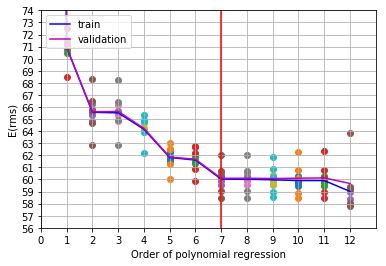

Got best order = 7


In [5]:
#part2->2 plot
import pylab as pl
pl.plot(rmstnav, color='b', label='train')
pl.plot(rmsvlav, color='m', label='validation')
for r in range(0, 13):
    pl.scatter(5*[r], rmstn[r])
    pl.scatter(5*[r], rmsvl[r])
pl.grid()
pl.xticks([u for u in range(0,13)])
pl.yticks([u for u in range(56,75)])
pl.xlabel('Order of polynomial regression')#x-axis
pl.ylabel('E(rms)')#y-axis
pl.legend(loc='upper left')
pl.xlim(0., 13.)
pl.ylim(56., 74.)
plt.axvline(x=7, color = 'r')
pl.show()
print('Got best order (for V only) = %d' % (7))

In [6]:
#part 2->3
rmstn3 = []
rmsvl3 = []
rmstnav3 = []
rmsvlav3 = []
for v in range(1, 16):
    crosstn = []
    crossvl = []
    
    #EXP 1 -> change
    #print('p1, order = ', v)
    AT_train = np.concatenate((at2,at3,at4,at5), axis=0) #change
    V_train = np.concatenate((v2,v3,v4,v5), axis=0) #change
    AP_train = np.concatenate((ap2,ap3,ap4,ap5), axis=0) #change
    RH_train = np.concatenate((rh2,rh3,rh4,rh5), axis=0) #change 
    y_train = np.concatenate((p2,p3, p4,p5), axis=0) # numpy array of P (t)
    y_val = p1 #change
    
    XT1 = np.vstack([(9568-1913)*[1]])
    XVT1 = np.stack((1913)*[1])
    if ((v&8) == 8): 
        XT1=np.vstack([RH_train, XT1])
        XVT1=np.vstack([rh1, XVT1])
    if ((v&4) == 4): 
        XT1=np.vstack([AP_train, XT1])
        XVT1=np.vstack([ap1, XVT1])
    if ((v&2) == 2): 
        XT1=np.vstack([V_train, XT1])
        XVT1=np.vstack([v1, XVT1])
    if ((v&1) == 1): 
        XT1=np.vstack([AT_train, XT1])
        XVT1=np.vstack([at1, XVT1])
    
    # function calculation
    X1 = XT1.transpose() # numpy matrix of capital X (X)
    XV1 = XVT1.transpose() # (VAL) numpy matrix of capital X (X)
    X_temp = np.dot(XT1, X1)
    X_temp = inv(X_temp)
    X_temp = np.dot(X_temp, XT1)
    w1 = np.dot(X_temp, y_train)
    y_predtn = np.dot(X1, w1)
    crosstn.append(mean_squared_error(y_train, y_predtn))
    # validation
    y_predvl = np.dot(XV1, w1)
    crossvl.append(mean_squared_error(y_val, y_predvl))
    #print ('Got crosstn = %d & crossvl = %d' % (crosstn[0], crossvl[0]))
    
    #EXP 2 -> change
    #print('p2, order = ', v) #change
    AT_train = np.concatenate((at1,at3,at4,at5), axis=0) #change
    V_train = np.concatenate((v1,v3,v4,v5), axis=0) #change
    AP_train = np.concatenate((ap1,ap3,ap4,ap5), axis=0) #change
    RH_train = np.concatenate((rh1,rh3,rh4,rh5), axis=0) #change
    y_train = np.concatenate((p1,p3, p4,p5), axis=0) #change
    y_val = p2 #change
    
    XT1 = np.vstack([(9568-1913)*[1]])
    XVT1 = np.stack((1913)*[1])
    if ((v&8) == 8): 
        XT1=np.vstack([RH_train, XT1])
        XVT1=np.vstack([rh2, XVT1])
    if ((v&4) == 4): 
        XT1=np.vstack([AP_train, XT1])
        XVT1=np.vstack([ap2, XVT1])
    if ((v&2) == 2): 
        XT1=np.vstack([V_train, XT1])
        XVT1=np.vstack([v2, XVT1])
    if ((v&1) == 1): 
        XT1=np.vstack([AT_train, XT1])
        XVT1=np.vstack([at2, XVT1])
    
    # function calculation
    X1 = XT1.transpose() # numpy matrix of capital X (X)
    XV1 = XVT1.transpose() # (VAL) numpy matrix of capital X (X)
    X_temp = np.dot(XT1, X1)
    X_temp = inv(X_temp)
    X_temp = np.dot(X_temp, XT1)
    w1 = np.dot(X_temp, y_train)
    y_predtn = np.dot(X1, w1)
    crosstn.append(mean_squared_error(y_train, y_predtn))
    # validation
    y_predvl = np.dot(XV1, w1)
    crossvl.append(mean_squared_error(y_val, y_predvl))
    #print ('Got crosstn = %d & crossvl = %d' % (crosstn[1], crossvl[1]))
    
    #EXP 3 -> change
    #print('p3, order = ', v)
    AT_train = np.concatenate((at2,at1,at4,at5), axis=0) #change
    V_train = np.concatenate((v2,v1,v4,v5), axis=0) #change
    AP_train = np.concatenate((ap2,ap1,ap4,ap5), axis=0) #change
    RH_train = np.concatenate((rh2,rh1,rh4,rh5), axis=0) #change
    y_train = np.concatenate((p2,p1, p4,p5), axis=0) #change
    y_val = p3 #change
    
    XT1 = np.vstack([(9568-1913)*[1]])
    XVT1 = np.stack((1913)*[1])
    if ((v&8) == 8): 
        XT1=np.vstack([RH_train, XT1])
        XVT1=np.vstack([rh3, XVT1])
    if ((v&4) == 4): 
        XT1=np.vstack([AP_train, XT1])
        XVT1=np.vstack([ap3, XVT1])
    if ((v&2) == 2): 
        XT1=np.vstack([V_train, XT1])
        XVT1=np.vstack([v3, XVT1])
    if ((v&1) == 1): 
        XT1=np.vstack([AT_train, XT1])
        XVT1=np.vstack([at3, XVT1])
    
    # function calculation
    X1 = XT1.transpose() # numpy matrix of capital X (X)
    XV1 = XVT1.transpose() # (VAL) numpy matrix of capital X (X)
    X_temp = np.dot(XT1, X1)
    X_temp = inv(X_temp)
    X_temp = np.dot(X_temp, XT1)
    w1 = np.dot(X_temp, y_train)
    y_predtn = np.dot(X1, w1)
    crosstn.append(mean_squared_error(y_train, y_predtn))
    # validation
    y_predvl = np.dot(XV1, w1)
    crossvl.append(mean_squared_error(y_val, y_predvl))
    #print ('Got crosstn = %d & crossvl = %d' % (crosstn[2], crossvl[2]))
    
    #EXP 4 -> change
    #print('p4, order = ', v)
    AT_train = np.concatenate((at2,at3,at1,at5), axis=0) #change
    V_train = np.concatenate((v2,v3,v1,v5), axis=0) #change
    AP_train = np.concatenate((ap2,ap3,ap1,ap5), axis=0) #change
    RH_train = np.concatenate((rh2,rh3,rh1,rh5), axis=0) #change
    y_train = np.concatenate((p2,p3, p1,p5), axis=0) #change
    y_val = p4 #change
    XT1 = np.vstack([(9568-1913)*[1]])
    XVT1 = np.stack((1913)*[1])
    if ((v&8) == 8): 
        XT1=np.vstack([RH_train, XT1])
        XVT1=np.vstack([rh4, XVT1])
    if ((v&4) == 4): 
        XT1=np.vstack([AP_train, XT1])
        XVT1=np.vstack([ap4, XVT1])
    if ((v&2) == 2): 
        XT1=np.vstack([V_train, XT1])
        XVT1=np.vstack([v4, XVT1])
    if ((v&1) == 1): 
        XT1=np.vstack([AT_train, XT1])
        XVT1=np.vstack([at4, XVT1])
    
    # function calculation
    X1 = XT1.transpose() # numpy matrix of capital X (X)
    XV1 = XVT1.transpose() # (VAL) numpy matrix of capital X (X)
    X_temp = np.dot(XT1, X1)
    X_temp = inv(X_temp)
    X_temp = np.dot(X_temp, XT1)
    w1 = np.dot(X_temp, y_train)
    y_predtn = np.dot(X1, w1)
    crosstn.append(mean_squared_error(y_train, y_predtn))
    # validation
    y_predvl = np.dot(XV1, w1)
    crossvl.append(mean_squared_error(y_val, y_predvl))
    #print ('Got crosstn = %d & crossvl = %d' % (crosstn[3], crossvl[3]))
    
    #EXP 5 -> change
    #print('p5, order = ', v)
    AT_train = np.concatenate((at2,at3,at4,at1), axis=0) #change
    V_train = np.concatenate((v2,v3,v4,v1), axis=0) #change
    AP_train = np.concatenate((ap2,ap3,ap4,ap1), axis=0) #change
    RH_train = np.concatenate((rh2,rh3,rh4,rh1), axis=0) #change
    y_train = np.concatenate((p2,p3, p4,p1), axis=0) #change
    y_val = p5 #change
    XT1 = np.vstack([(9568-1916)*[1]])
    XVT1 = np.stack((1916)*[1])
    if ((v&8) == 8): 
        XT1=np.vstack([RH_train, XT1])
        XVT1=np.vstack([rh5, XVT1])
    if ((v&4) == 4): 
        XT1=np.vstack([AP_train, XT1])
        XVT1=np.vstack([ap5, XVT1])
    if ((v&2) == 2): 
        XT1=np.vstack([V_train, XT1])
        XVT1=np.vstack([v5, XVT1])
    if ((v&1) == 1): 
        XT1=np.vstack([AT_train, XT1])
        XVT1=np.vstack([at5, XVT1])
    
    # function calculation
    X1 = XT1.transpose() # numpy matrix of capital X (X)
    XV1 = XVT1.transpose() # (VAL) numpy matrix of capital X (X)
    X_temp = np.dot(XT1, X1)
    X_temp = inv(X_temp)
    X_temp = np.dot(X_temp, XT1)
    w1 = np.dot(X_temp, y_train)
    y_predtn = np.dot(X1, w1)
    crosstn.append(mean_squared_error(y_train, y_predtn))
    # validation
    y_predvl = np.dot(XV1, w1)
    crossvl.append(mean_squared_error(y_val, y_predvl))
    #print ('Got crosstn = %d & crossvl = %d' % (crosstn[4], crossvl[4]))
    
    rmstn3.append(crosstn)
    rmsvl3.append(crossvl)
    rmstnav3.append(sum(crosstn) / float(len(crosstn)))
    rmsvlav3.append(sum(crossvl) / float(len(crossvl)))

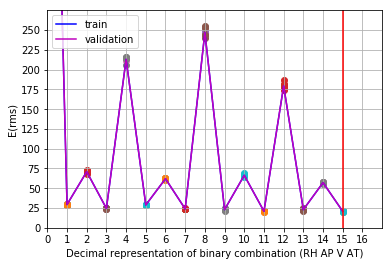

Since min = 15 (all features present), therefore best combination is all four features together


In [7]:
pl.plot([1000]+rmstnav3, color='b', label='train')
pl.plot([1000]+rmsvlav3, color='m', label='validation')
for r in range(0, 15):
    pl.scatter(5*[r+1], rmstn3[r])
    pl.scatter(5*[r+1], rmsvl3[r])
pl.grid()
pl.xticks([u for u in range(0,17)])
pl.yticks([u*25 for u in range(0,11)])
pl.xlabel('Decimal representation of binary combination (RH AP V AT)')#x-axis
pl.ylabel('E(rms)')#y-axis
pl.legend(loc='upper left')
pl.xlim(0., 17.)
pl.ylim(0., 275.)
plt.axvline(x=np.argmin(rmsvlav3)+1, color = 'r')
pl.show()
print('Since min = 15 (all features present), therefore best combination is all four features together')